In [1]:
# numpy laibary
import numpy as np
# import pandas laibary
import pandas as pd

# visulaization laibary
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# regression model
from sklearn.linear_model import LogisticRegression

# classifier model
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# ensemble model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [5]:
# METRICS
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import plot_roc_curve

In [6]:
# load dataset
ds=pd.read_csv('telecom.csv')
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
pd.set_option('display.max_columns',None)

In [8]:
# put into dataframe
df=pd.DataFrame(ds)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
# Check white spaces in target chrun
df.loc[df['Churn']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:
df=df.replace(" ",np.nan)

In [11]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. In this dataset 7043 rows and 21 columns with target
2. In this dataset we have 2 float type dataset out of 21 columns.
3. In this dataset we have 2 int type dataset out of 21 columns.
4. In this dataset we have 17 object type dataset out of 21 columns.
5. There is in only  null values are presnt in on ecolumns in our dataset

In [12]:
# Make total charges numerical from object variable
df['TotalCharges']=df['TotalCharges'].astype('float')
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [13]:
# check null values 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Here null values are present in only in Total Charages in datset

<AxesSubplot:>

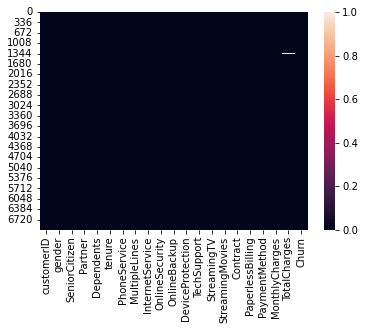

In [14]:
# null value plotting
sns.heatmap(df.isnull())

# Separate both type like numerical and categorical type dataset

# Categorical Type Dataset

In [15]:
df1=df.select_dtypes(['object'])

In [16]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [17]:
df1.isnull().sum().sum()

0

# UNIQUE VALUES

In [18]:
for i in df1.columns:
    df1[i].nunique()
    print(df1[i])

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object
0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: object
0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object
0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object
0        No
1       Yes
2 

Here in customer Id data have diffrent for diffrent person so it is not usefull so we drop it.

In [19]:
df1=df1.drop(['customerID'],axis=1)

In [20]:
df1

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


# Uni-Varient-Analysis

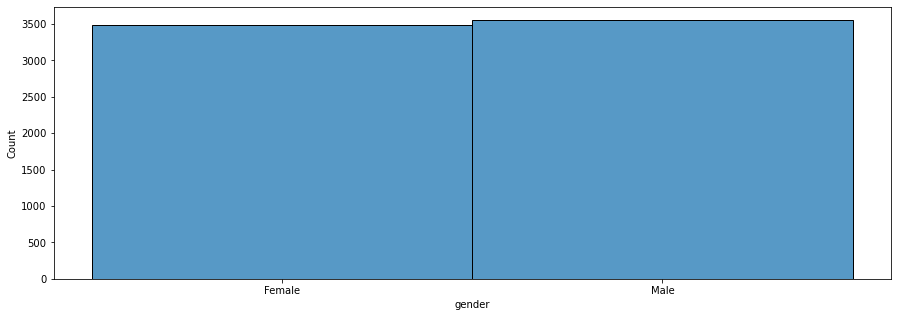

In [21]:
plt.figure(figsize=(15,5))
sns.histplot(df1.gender)
plt.show()

Here in our dataset male and female are almost equal.

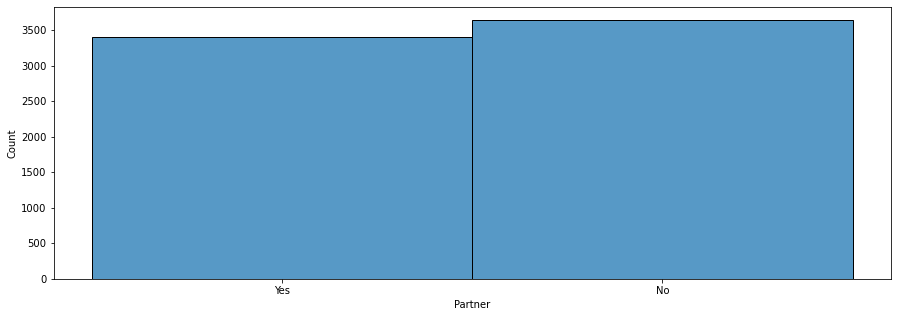

In [22]:
plt.figure(figsize=(15,5))
sns.histplot(df1.Partner)
plt.show()

In partner,no is more compare to yes

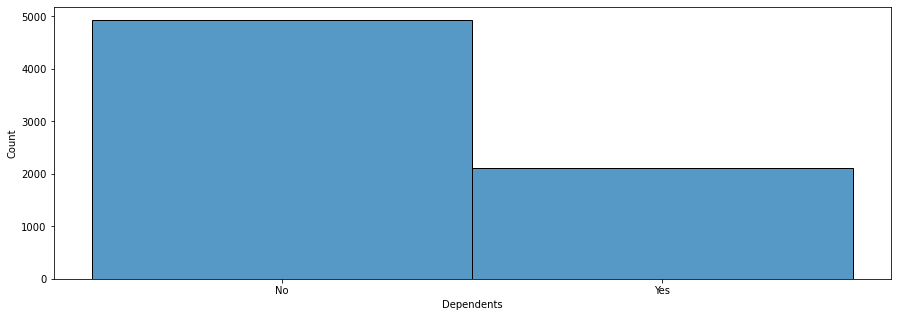

In [23]:
plt.figure(figsize=(15,5))
sns.histplot(df1.Dependents)
plt.show()

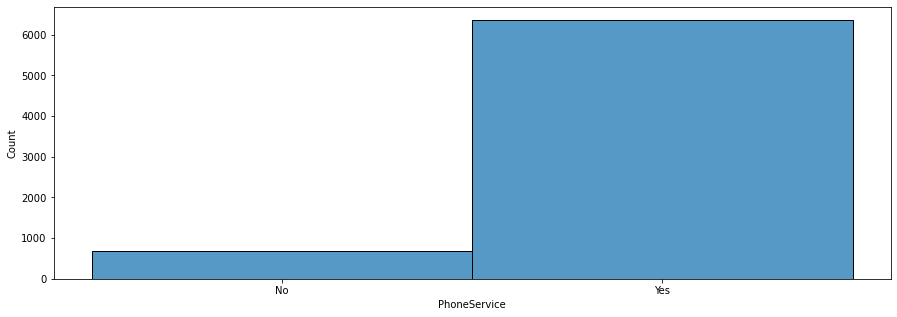

In [24]:
plt.figure(figsize=(15,5))
sns.histplot(df1.PhoneService)
plt.show()

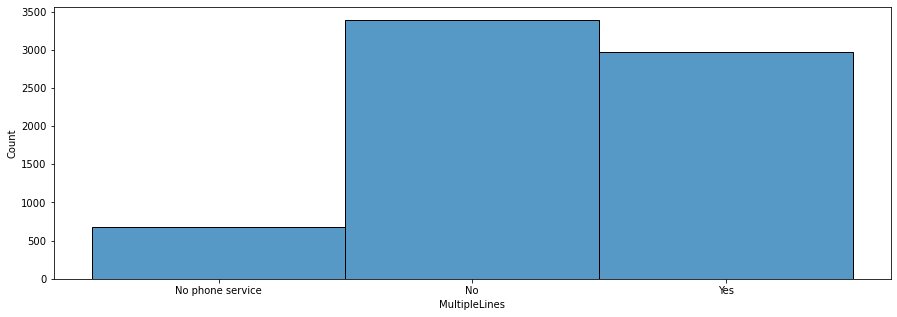

In [25]:
plt.figure(figsize=(15,5))
sns.histplot(df1.MultipleLines)
plt.show()

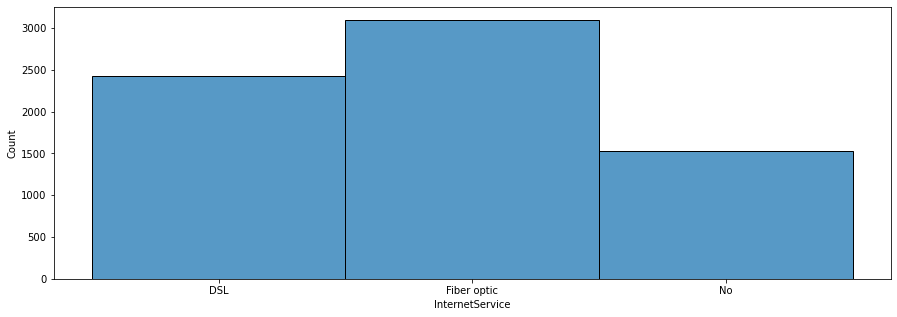

In [26]:
plt.figure(figsize=(15,5))
sns.histplot(df1.InternetService)
plt.show()

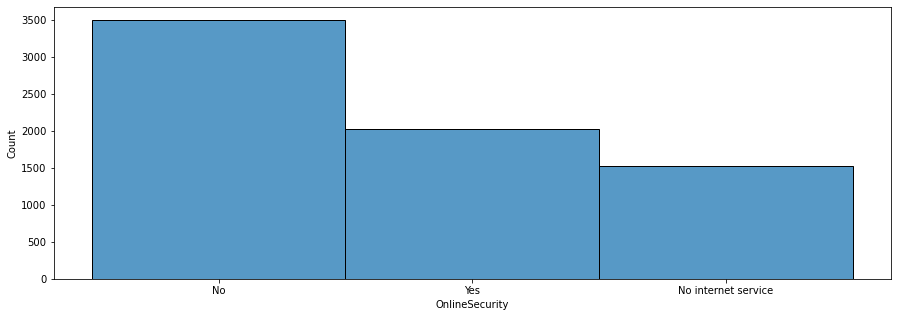

In [27]:
plt.figure(figsize=(15,5))
sns.histplot(df1.OnlineSecurity)
plt.show()

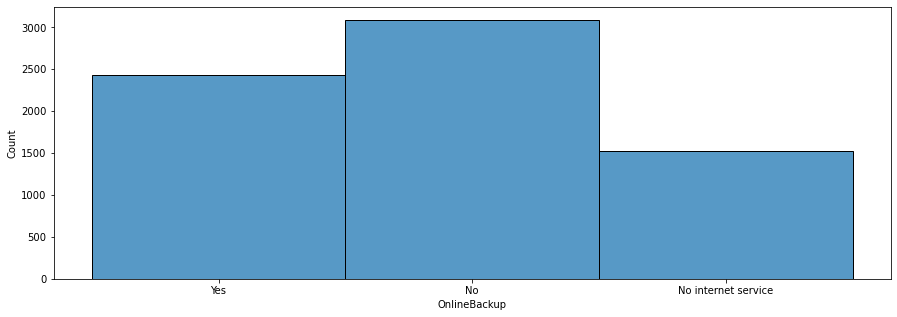

In [28]:
plt.figure(figsize=(15,5))
sns.histplot(df1.OnlineBackup)
plt.show()

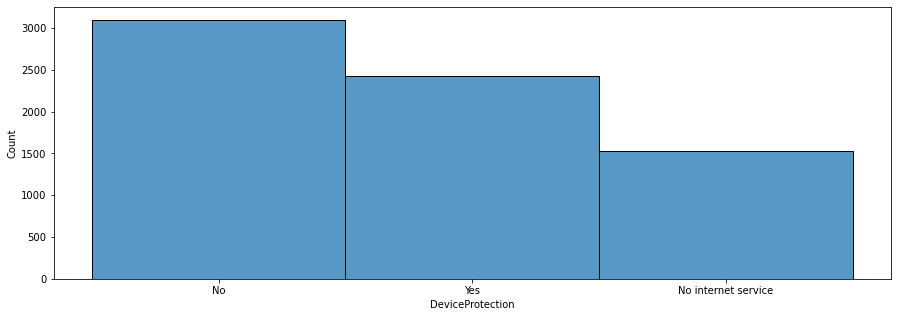

In [29]:
plt.figure(figsize=(15,5))
sns.histplot(df1.DeviceProtection)
plt.show()

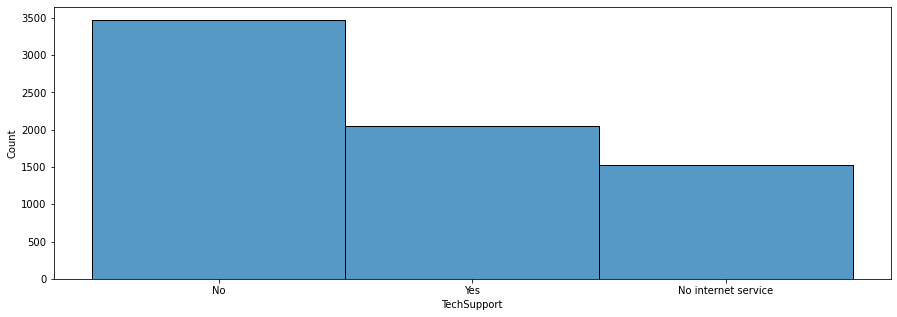

In [30]:
plt.figure(figsize=(15,5))
sns.histplot(df1.TechSupport)
plt.show()

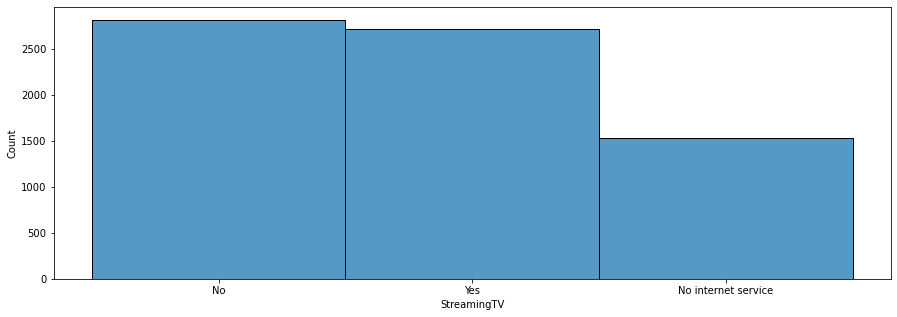

In [31]:
plt.figure(figsize=(15,5))
sns.histplot(df1.StreamingTV)
plt.show()

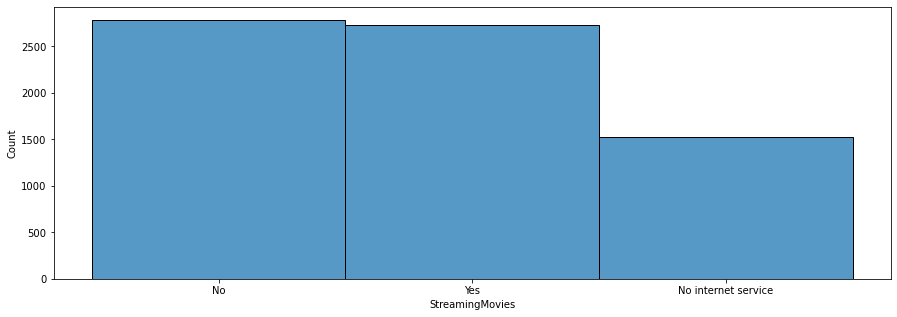

In [32]:
plt.figure(figsize=(15,5))
sns.histplot(df1.StreamingMovies)
plt.show()

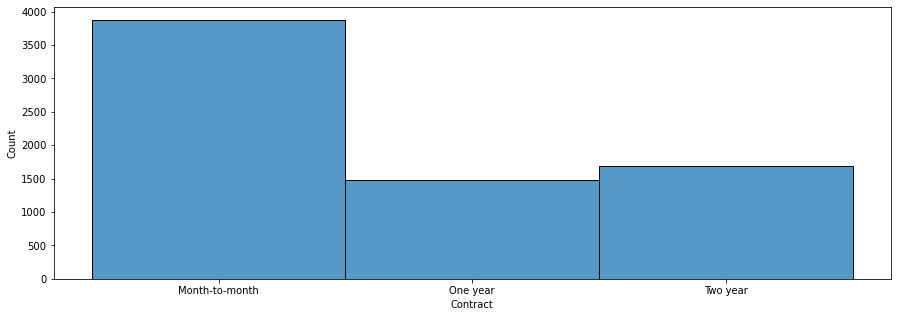

In [33]:
plt.figure(figsize=(15,5))
sns.histplot(df1.Contract)
plt.show()

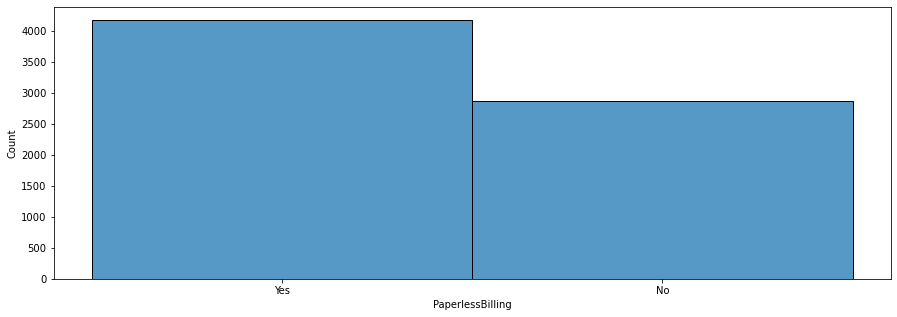

In [34]:
plt.figure(figsize=(15,5))
sns.histplot(df1.PaperlessBilling)
plt.show()

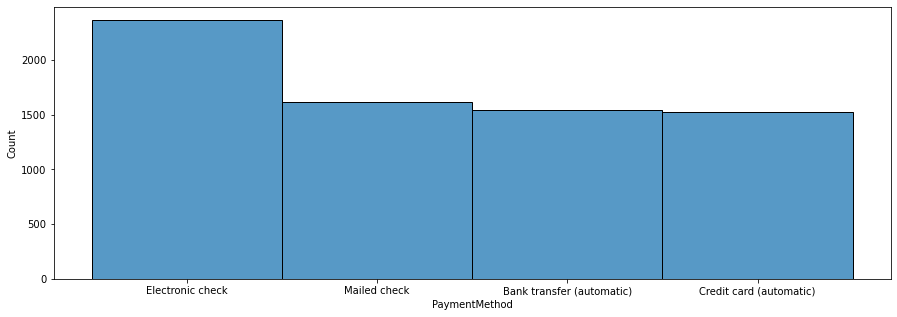

In [35]:
plt.figure(figsize=(15,5))
sns.histplot(df1.PaymentMethod)
plt.show()

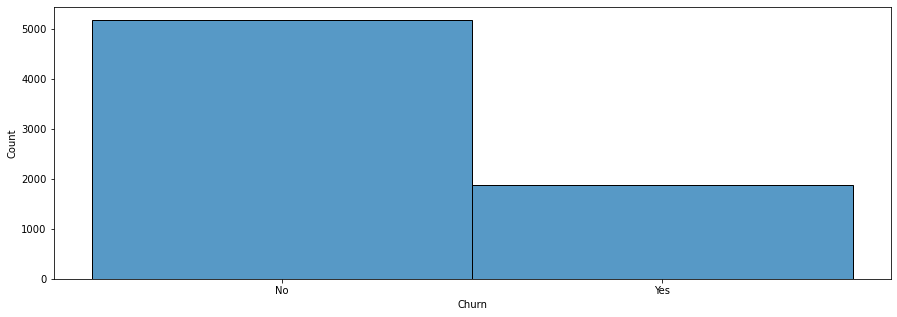

In [36]:
plt.figure(figsize=(15,5))
sns.histplot(df1.Churn)
plt.show()

# Bi-Varient-Analysis

In [37]:
df1['chrun']=np.where(df1['Churn']=='Yes',1,0)  #make target variable of numerical type 

In [38]:
df1

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,chrun
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,0
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,0
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,1


In [39]:
def categorical_plot(df1,variable,target=df1.chrun):
    plt.figure(figsize=(15,5))
    sns.lineplot(y=df1[variable],x=target)
    plt.title(f"Comparision between {variable} and Chrun")
    plt.show()

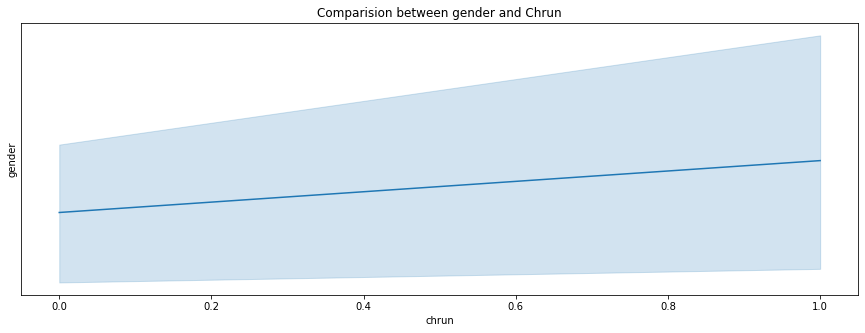

In [40]:
categorical_plot(df1,variable='gender')

1. Mostly Female customer are do not continue their business.
2. Less Male customer left business with that company compare to female.

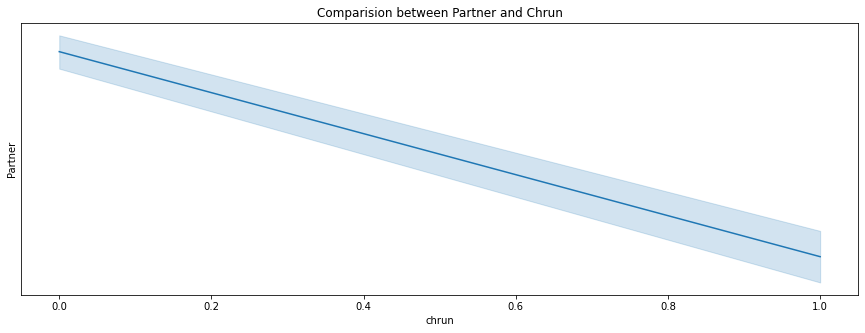

In [41]:
categorical_plot(df1,variable='Partner')

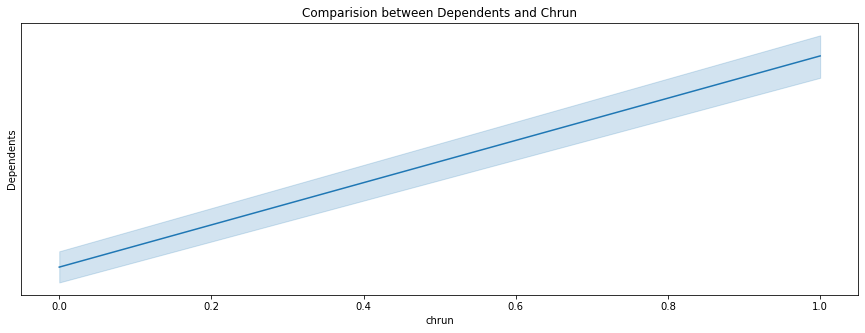

In [42]:
categorical_plot(df1,variable='Dependents')

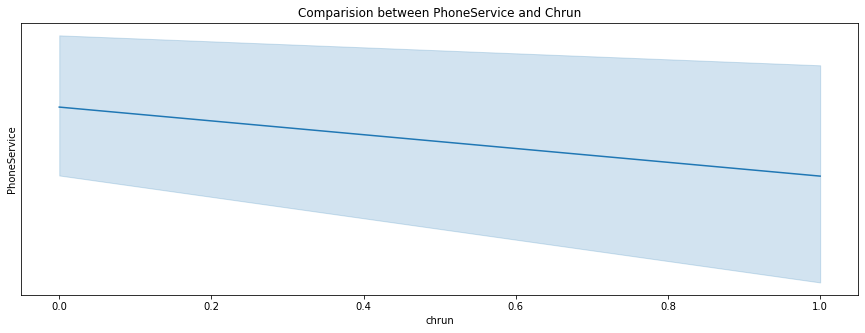

In [43]:
categorical_plot(df1,variable='PhoneService')

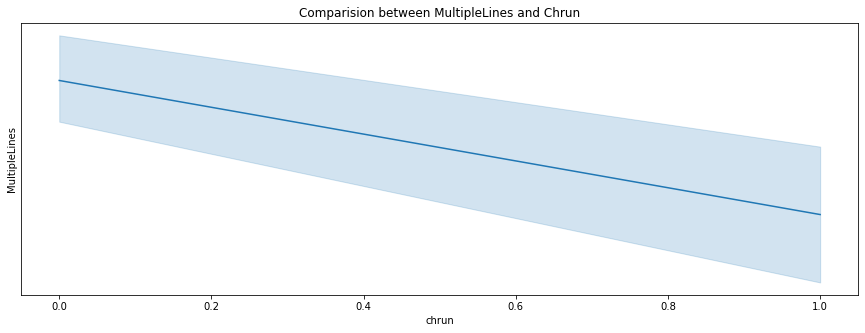

In [44]:
categorical_plot(df1,variable='MultipleLines')

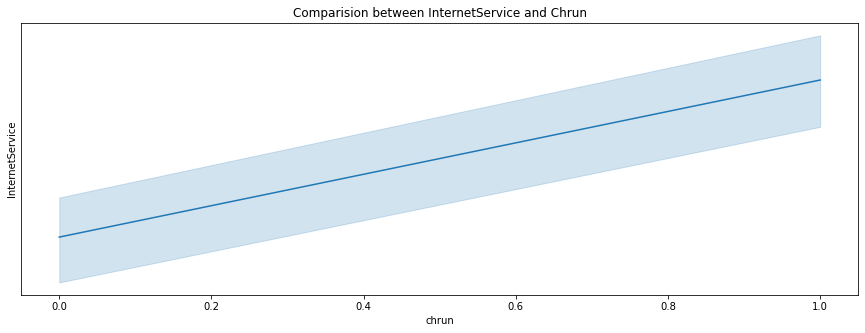

In [45]:
categorical_plot(df1,variable='InternetService')

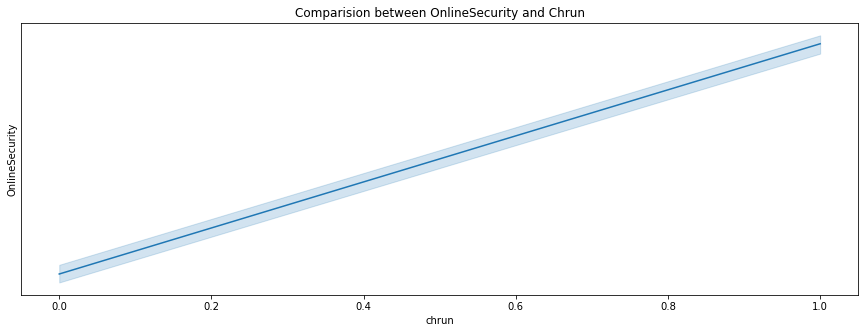

In [46]:
categorical_plot(df1,variable='OnlineSecurity')

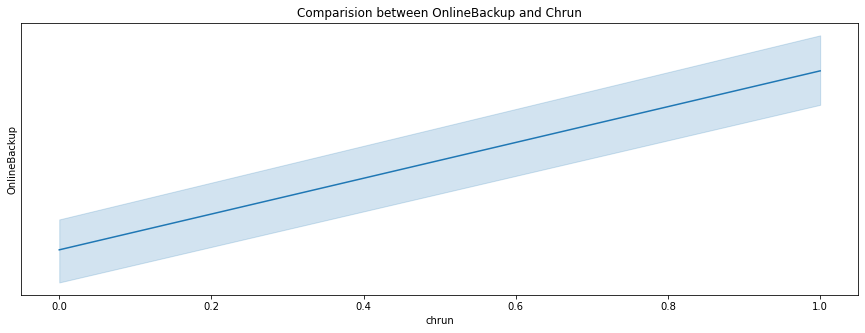

In [47]:
categorical_plot(df1,variable='OnlineBackup')

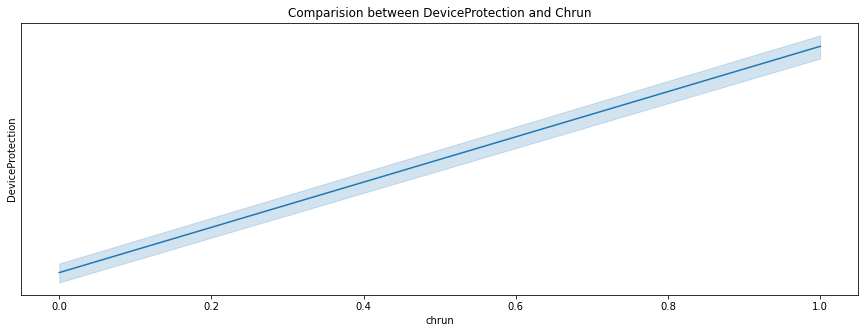

In [48]:
categorical_plot(df1,variable='DeviceProtection')

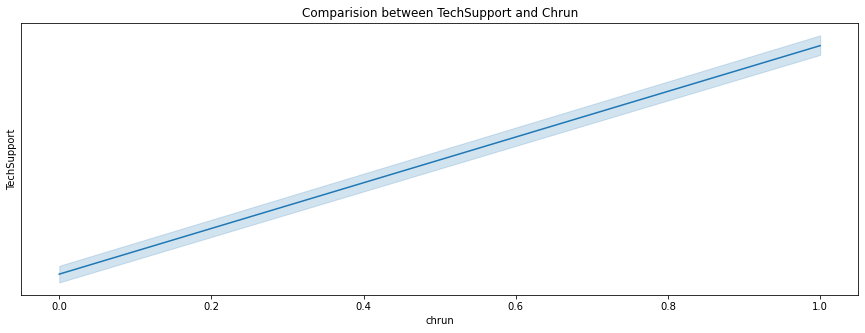

In [49]:
categorical_plot(df1,variable='TechSupport')

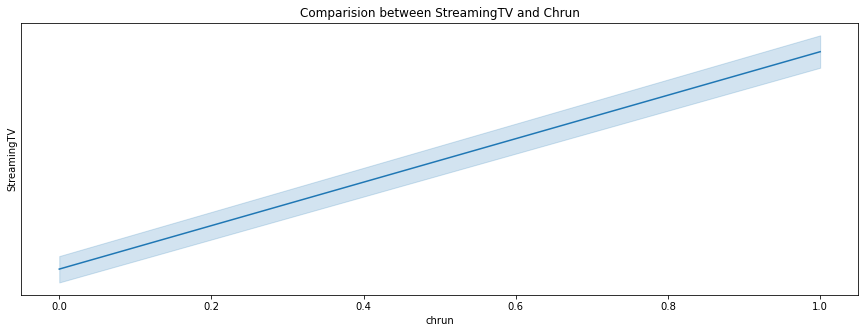

In [50]:
categorical_plot(df1,variable='StreamingTV')

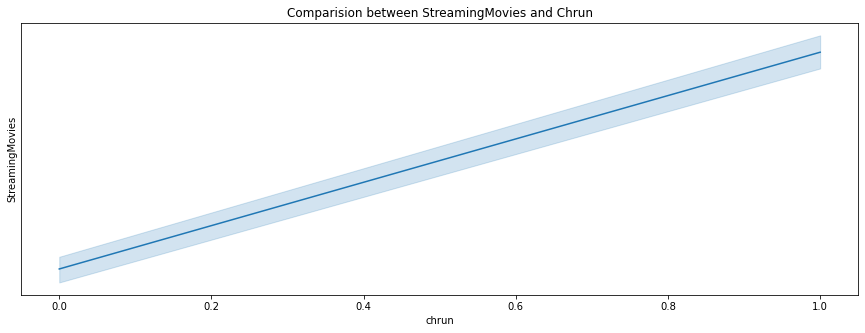

In [51]:
categorical_plot(df1,variable='StreamingMovies')

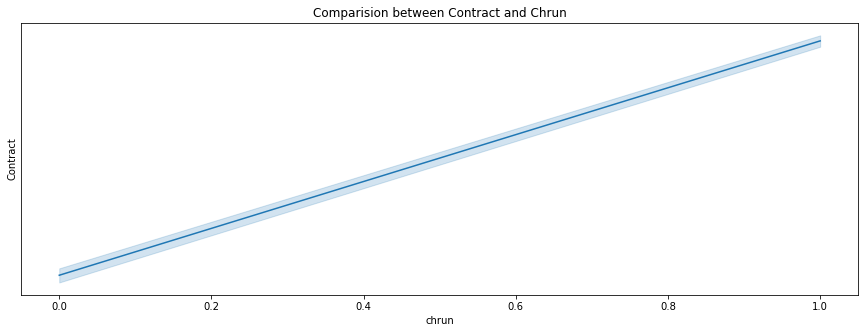

In [52]:
categorical_plot(df1,variable='Contract')

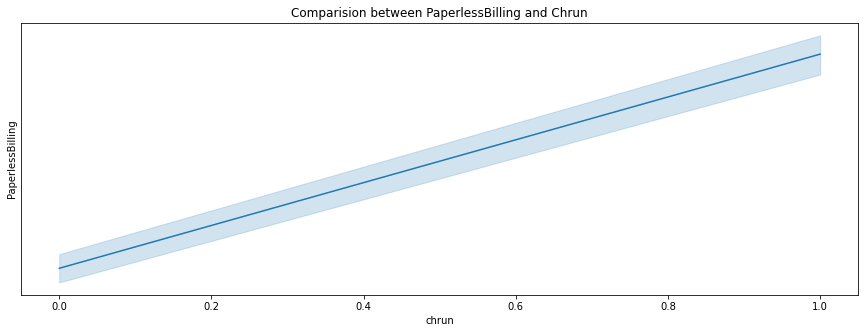

In [53]:
categorical_plot(df1,variable='PaperlessBilling')

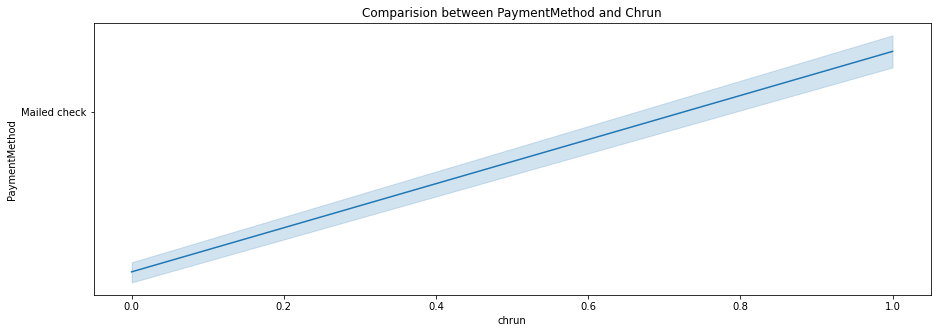

In [54]:
categorical_plot(df1,variable='PaymentMethod')

# Label Encoder Method

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le=LabelEncoder()

In [57]:
for i in df1.columns:
    df1[i]=le.fit_transform(df1[i])

In [58]:
df1

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,chrun
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,0
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,0
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,1


In [59]:
df1=df1.drop(['chrun'],axis=1)

# Numereical Type Dateset

In [60]:
df2=df.select_dtypes(['float','int'])
df2

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [61]:
# Check null values
df2.isnull().sum()

tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64

Null values are present in TotalCharges

# Impute Method

In [62]:
from sklearn.impute import SimpleImputer

In [63]:
st=SimpleImputer(strategy='mean')

In [64]:
df2['TotalCharges']=st.fit_transform(df2['TotalCharges'].values.reshape(-1,1))

In [65]:
df2.isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [66]:
df2

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


# Merge Both Dataset

In [67]:
df=pd.concat([df1,df2],axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,2,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,24,84.80,1990.50
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,72,103.20,7362.90
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,11,29.60,346.45
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,4,74.40,306.60


# Statistic Of Dataset

In [68]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,0.265370,32.371149,64.761692,2283.300441
std,0.500013,0.368612,0.499748,0.458110,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,0.441561,24.559481,30.090047,2265.000258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,35.500000,402.225000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,29.000000,70.350000,1400.550000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,55.000000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,72.000000,118.750000,8684.800000


1. Outliers Are Present-->tenure,Mon,thlyCharges,TotalCharges
2. right side skewness-->tenure,TotalCharges
3. Left side skewness-->MonthlyCharges

# Check Outliers 

In [69]:
col=df.columns
ncol=10
nrow=2

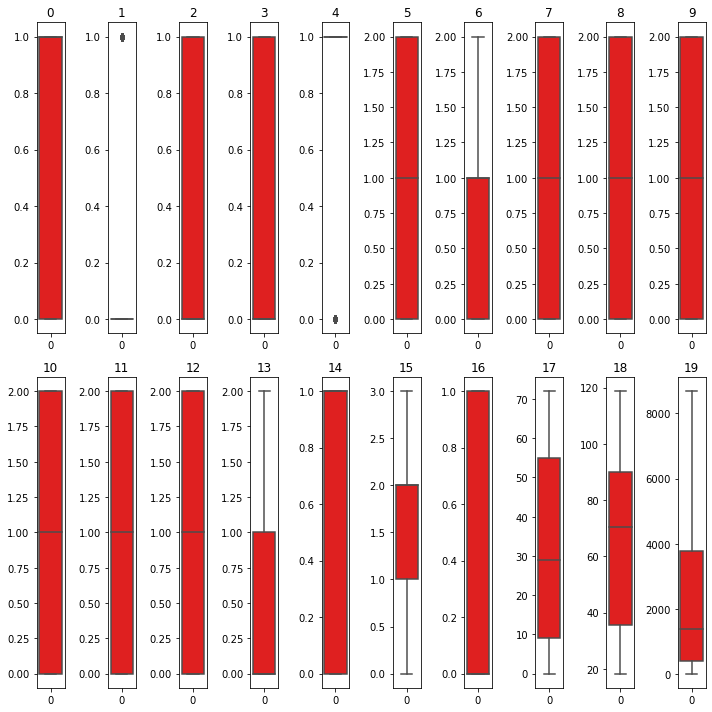

In [70]:
plt.figure(figsize=(ncol,1*ncol))
for i in range(len(col)):
    plt.subplot(nrow,ncol,i+1)
    plt.title(i)
    sns.boxplot(data=df[col[i]],orient='v',color='red')
    plt.tight_layout()

There is no outliers are present in dataset

# Check Correlation

In [71]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.001874,-0.001808,0.010517,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.008612,0.005106,-0.014569,0.000048
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.150889,0.016567,0.220173,0.102395
Partner,-0.001808,0.016479,1.000000,0.452676,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,-0.150448,0.379697,0.096848,0.318812
Dependents,0.010517,-0.211185,0.452676,1.000000,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.164221,0.159712,-0.113890,0.064535
PhoneService,-0.006488,0.008576,0.017706,-0.001762,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.011942,0.008448,0.247398,0.112851
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.038037,0.343032,0.433576,0.452883
InternetService,-0.000863,-0.032310,0.000891,0.044590,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.047291,-0.030359,-0.323260,-0.175429
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.289309,0.325468,-0.053878,0.254308
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,-0.195525,0.370876,0.119777,0.375362
DeviceProtection,0.000549,-0.021398,0.166330,0.080537,0.003727,0.122318,0.044944,0.175985,0.187757,1.000000,0.240593,0.276652,0.288799,0.350277,-0.038234,-0.135750,-0.178134,0.371105,0.163652,0.388864


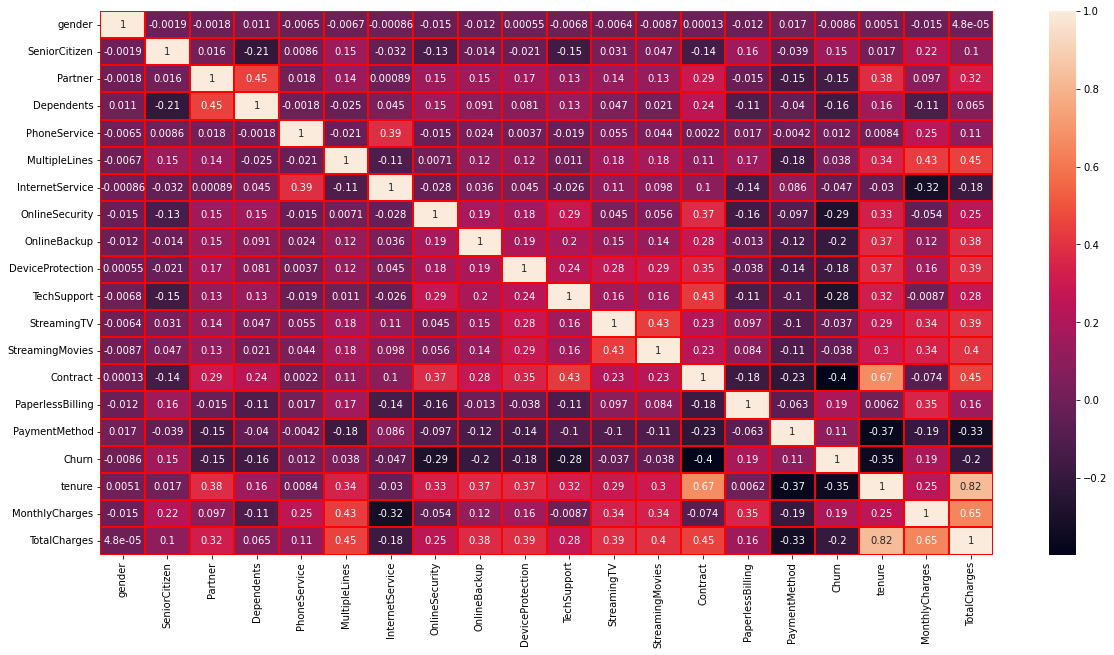

In [72]:
# plot heatmap for correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidth=2,linecolor='red',annot=True)
plt.show()

1. Gender correlated with target Chrun with -0.86%.It like weak bond.
2. Senior Citizen correlated with target Chrun with 15%.It like very good bond.
3. Partenr  correlated with target Chrun with -15%.It like very good bond.
4. Dependents correlated with target Chrun with -16%.It like very good bond.
5. Phone Service correlated with target Chrun with 1.2%.It like good bond.
6. MultipleLines correlated with target Chrun with 3.8%.It like good bond.
7. Internet Service correlated with target Chrun with -4.7%.It like good bond.
8. Online security correlated with target Chrun with -29%.It like strong bond.
9. Onlinebackup correlated with target Chrun with -20%.It like very good bond.
10. DeviceProtection correlated with target Chrun with -18%.It like very good bond.
11. TechSupport correlated with target Chrun with -28%.It like strong bond.
12. StreamingTVcorrelated with target Chrun with -3.7%.It like good bond.
13. StreamingMovies correlated with target Chrun with -3.8%.It like good bond.
14. Contract correlated with target Chrun with -40%.It like very strong bond.
15. PaperlessBilling correlated with target Chrun with 19%.It like very good bond.
16. PaymentsMethod correlated with target Chrun with 11%.It like very good bond.
17. Tenure correlated with target Chrun with -35%.It like very strong bond.
18. MontyhlyCharges correlated with target Chrun with 19%.It like very good bond.
19. Total Charges correlated with target Chrun with -20%.It like very good bond.

remove Gender it is not correlaed with target

In [73]:
df1=df1.drop(['gender'],axis=1)

# we not apply any kind of transformation on categorical and target variable so we apply only on Numerical dataset

In [74]:
df2

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


# Check Outliers

In [75]:
from scipy.stats import zscore

In [76]:
(np.abs(zscore(df2))<3).all().all()

True

No outliers are present in our dataset

In [77]:
(np.abs(zscore(df2))<3).all()

tenure            True
MonthlyCharges    True
TotalCharges      True
dtype: bool

# Check skewness

In [78]:
df2.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

take thyreshold value +/-0.5 then skewness are present -->TotalCharges=      0.962394

# Power Method

In [79]:
from sklearn.preprocessing import power_transform

In [80]:
df3=power_transform(df2)

In [81]:
type(df3)

numpy.ndarray

In [82]:
df3=pd.DataFrame(df3,columns=df2.columns)

In [83]:
df3.skew()

tenure           -0.243325
MonthlyCharges   -0.259035
TotalCharges     -0.144899
dtype: float64

# Merge both dataset

In [84]:
df=pd.concat([df3,df1],axis=1)
df

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.644343,-1.158541,-1.810588,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0.297205,-0.239492,0.253313,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,-1.495444,-0.342665,-1.387269,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0.646327,-0.731079,0.232253,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,-1.495444,0.213545,-1.250118,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.078084,0.671510,0.295688,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,1.342198,1.260981,1.567097,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,-0.725121,-1.167241,-0.859899,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,-1.265130,0.334312,-0.922968,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


# Separate dataset into Dependent and Independent Variable

In [85]:
x=df.drop(['Churn'],axis=1)

In [86]:
y=df.Churn

# Standard Scaler Method

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
st=StandardScaler()

In [89]:
x1=st.fit_transform(x)

In [90]:
x1

array([[-1.6443435 , -1.1585412 , -1.81058786, ..., -0.8282069 ,
         0.8297975 ,  0.39855772],
       [ 0.29720527, -0.23949171,  0.25331304, ...,  0.37127103,
        -1.20511329,  1.33486261],
       [-1.49544443, -0.34266505, -1.38726921, ..., -0.8282069 ,
         0.8297975 ,  1.33486261],
       ...,
       [-0.72512119, -1.16724064, -0.85989943, ..., -0.8282069 ,
         0.8297975 ,  0.39855772],
       [-1.26512968,  0.33431207, -0.92296815, ..., -0.8282069 ,
         0.8297975 ,  1.33486261],
       [ 1.20189603,  1.33886338,  1.48444325, ...,  1.57074896,
         0.8297975 , -1.47405205]])

In [91]:
x=pd.DataFrame(x1,columns=x.columns)
x

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-1.644343,-1.158541,-1.810588,-0.439916,1.034530,-0.654012,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558
1,0.297205,-0.239492,0.253313,-0.439916,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863
2,-1.495444,-0.342665,-1.387269,-0.439916,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863
3,0.646327,-0.731079,0.232253,-0.439916,-0.966622,-0.654012,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052
4,-1.495444,0.213545,-1.250118,-0.439916,-0.966622,-0.654012,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.078084,0.671510,0.295688,-0.439916,1.034530,1.529024,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863
7039,1.342198,1.260981,1.567097,-0.439916,1.034530,1.529024,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747
7040,-0.725121,-1.167241,-0.859899,-0.439916,1.034530,1.529024,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558
7041,-1.265130,0.334312,-0.922968,2.273159,1.034530,-0.654012,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863


# Check MultiColonility

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['Variable']=x.columns
    vif['Feature']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [94]:
calc_vif(x)

,Variable,Feature
0,tenure,28.950047
1,MonthlyCharges,9.003820
2,TotalCharges,40.844099
3,SeniorCitizen,1.149682
4,Partner,1.459032
5,Dependents,1.381284
6,PhoneService,1.625982
7,MultipleLines,1.393727
8,InternetService,1.964397
9,OnlineSecurity,1.254681


Multicolonility present in dataset Total charges

In [95]:
x=x.drop(['TotalCharges'],axis=1)

In [96]:
calc_vif(x)

,Variable,Feature
0,tenure,2.499368
1,MonthlyCharges,2.731657
2,SeniorCitizen,1.149678
3,Partner,1.458647
4,Dependents,1.379807
5,PhoneService,1.625565
6,MultipleLines,1.389753
7,InternetService,1.855506
8,OnlineSecurity,1.246852
9,OnlineBackup,1.179251


No more multicolonility present in dataset

# Check Imbalanceing

In [97]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Our target variable is classification type so imblanceing here

# SMOTE Technique

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [100]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [101]:
x.value_counts()

tenure     MonthlyCharges  SeniorCitizen  Partner    Dependents  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract   PaperlessBilling  PaymentMethod
-1.644343  -1.498609       -0.439916      -0.966622  -0.654012    0.327438     -0.991588       1.527734         0.244242        0.106315      0.108600          0.235518     0.016526     0.008503        -0.828207   0.829798          1.334863        5
           -1.518295       -0.439916      -0.966622  -0.654012    0.327438     -0.991588       1.527734         0.244242        0.106315      0.108600          0.235518     0.016526     0.008503        -0.828207  -1.205113          1.334863        5
           -1.521878       -0.439916      -0.966622  -0.654012    0.327438     -0.991588       1.527734         0.244242        0.106315      0.108600          0.235518     0.016526     0.008503        -0.828207  -1.205113          1.334863        4
     

# Find Best Model

# TRAIN TEST SPLIT METHOD

In [102]:
LO=LogisticRegression()
DT=DecisionTreeClassifier()
SV=SVC()
KN=KNeighborsClassifier()
AD=AdaBoostClassifier()
GR=GradientBoostingClassifier()
RF=RandomForestClassifier()

# MODEL-->LOGISTIC REGRESSION

In [103]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    LO.fit(x_train,y_train)
    pred=LO.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    print(f'At random satae {i} model give accuracy score is {acc}%')
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"At random state {i} model give max_accuracy {max_acc}")
        print('\n')

At random satae 0 model give accuracy score is 77.2463768115942%
At random state 0 model give max_accuracy 77.2463768115942


At random satae 1 model give accuracy score is 78.21256038647343%
At random state 1 model give max_accuracy 78.21256038647343


At random satae 2 model give accuracy score is 78.69565217391305%
At random state 2 model give max_accuracy 78.69565217391305


At random satae 3 model give accuracy score is 78.06763285024154%
At random satae 4 model give accuracy score is 77.82608695652173%
At random satae 5 model give accuracy score is 77.6328502415459%
At random satae 6 model give accuracy score is 77.92270531400966%
At random satae 7 model give accuracy score is 76.7632850241546%
At random satae 8 model give accuracy score is 77.58454106280193%
At random satae 9 model give accuracy score is 77.29468599033817%
At random satae 10 model give accuracy score is 77.68115942028986%
At random satae 11 model give accuracy score is 76.08695652173914%
At random satae 12 model

# At random state 37 model give accuracy score 79.32.

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=37)
LO.fit(x_train,y_train)
pred_test=LO.predict(x_test)
pred_train=LO.predict(x_train)

confusion=confusion_matrix(y_test,pred_test)
print(f"Confusion Matrix : {confusion}")

classification=classification_report(y_test,pred_test)
print(f"Classifiaction Report : {classification}")

test_LO=accuracy_score(y_test,pred_test)
print(f"Accuracy_Test : {test_LO}")

train_LO=accuracy_score(y_train,pred_train)
print(f"Accuracy_Train : {train_LO}")

Confusion Matrix : [[763 257]
 [190 860]]
Classifiaction Report :               precision    recall  f1-score   support

           0       0.80      0.75      0.77      1020
           1       0.77      0.82      0.79      1050

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070

Accuracy_Test : 0.7840579710144927
Accuracy_Train : 0.7773616815655956


# This model Give Information-->
1. Company left not chances is 82%
2. Company left chances is 77%
3. Accuracy by model is 79.32%
4. Avg Score is 80%
5. Do more analysis for best model

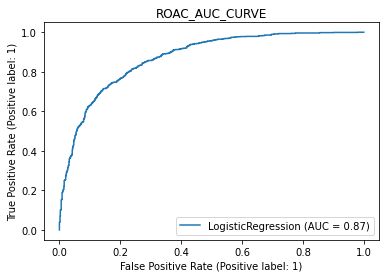

In [105]:
plot_roc_curve(LO,x_test,y_test)
plt.title('ROAC_AUC_CURVE')
plt.show()

Model give auc score is 87%

# MODEL-->DECISION TREE CLASSIFIER

In [106]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    DT.fit(x_train,y_train)
    pred=DT.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    print(f'At random state {i} model give accuracy score is {acc}%')
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"At random state {i} model give max_accuracy {max_acc}")
        print('\n')

At random state 0 model give accuracy score is 78.79227053140096%
At random state 0 model give max_accuracy 78.79227053140096


At random state 1 model give accuracy score is 77.6328502415459%
At random state 2 model give accuracy score is 79.17874396135267%
At random state 2 model give max_accuracy 79.17874396135267


At random state 3 model give accuracy score is 77.487922705314%
At random state 4 model give accuracy score is 79.7584541062802%
At random state 4 model give max_accuracy 79.7584541062802


At random state 5 model give accuracy score is 79.66183574879227%
At random state 6 model give accuracy score is 78.79227053140096%
At random state 7 model give accuracy score is 78.50241545893721%
At random state 8 model give accuracy score is 78.45410628019323%
At random state 9 model give accuracy score is 78.59903381642512%
At random state 10 model give accuracy score is 78.88888888888889%
At random state 11 model give accuracy score is 78.55072463768116%
At random state 12 model 

# At random state 22 model give accuracy score is 80.62%

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=22)
DT.fit(x_train,y_train)
pred_test=DT.predict(x_test)
pred_train=DT.predict(x_train)

confusion=confusion_matrix(y_test,pred_test)
print(f"Confusion Matrix : {confusion}")

classification=classification_report(y_test,pred_test)
print(f"Classifiaction Report : {classification}")

test_DT=accuracy_score(y_test,pred_test)
print(f"Accuracy_Test : {test_DT}")

train_DT=accuracy_score(y_train,pred_train)
print(f"Accuracy_Train : {train_DT}")

Confusion Matrix : [[831 233]
 [206 800]]
Classifiaction Report :               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1064
           1       0.77      0.80      0.78      1006

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

Accuracy_Test : 0.7879227053140097
Accuracy_Train : 0.9980671659821213


# This model Give Information-->
1. Company left not chances is 81%
2. Company left chances is 78%
3. Accuracy by the model is 80%
4. Avg Score is 80%
5. Do more analysis for the best model

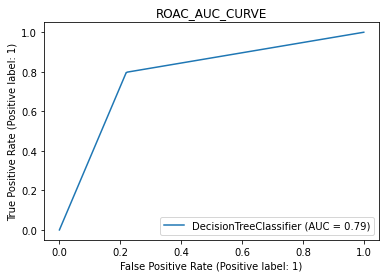

In [108]:
plot_roc_curve(DT,x_test,y_test)
plt.title('ROAC_AUC_CURVE')
plt.show()

The model gives AUC score is 80%

# MODEL-->SVC

In [109]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    SV.fit(x_train,y_train)
    pred=SV.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    print(f'At random state {i} model give accuracy score is {acc}%')
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"At random state {i} model give max_accuracy {max_acc}")
        print('\n')

At random state 0 model give accuracy score is 79.95169082125604%
At random state 0 model give max_accuracy 79.95169082125604


At random state 1 model give accuracy score is 79.66183574879227%
At random state 2 model give accuracy score is 79.85507246376812%
At random state 3 model give accuracy score is 80.14492753623188%
At random state 3 model give max_accuracy 80.14492753623188


At random state 4 model give accuracy score is 80.4830917874396%
At random state 4 model give max_accuracy 80.4830917874396


At random state 5 model give accuracy score is 80.67632850241546%
At random state 5 model give max_accuracy 80.67632850241546


At random state 6 model give accuracy score is 80.57971014492755%
At random state 7 model give accuracy score is 79.66183574879227%
At random state 8 model give accuracy score is 79.42028985507247%
At random state 9 model give accuracy score is 80.77294685990339%
At random state 9 model give max_accuracy 80.77294685990339


At random state 10 model give ac

At random state 32 model giev accuracy score is 81.64

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=32)
SV.fit(x_train,y_train)
pred_test=SV.predict(x_test)
pred_train=SV.predict(x_train)

confusion=confusion_matrix(y_test,pred_test)
print(f"Confusion Matrix : {confusion}")

classification=classification_report(y_test,pred_test)
print(f"Classifiaction Report : {classification}")

test_SV=accuracy_score(y_test,pred_test)
print(f"Accuracy_Test : {test_SV}")

train_SV=accuracy_score(y_train,pred_train)
print(f"Accuracy_Train : {train_SV}")

Confusion Matrix : [[806 220]
 [192 852]]
Classifiaction Report :               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1026
           1       0.79      0.82      0.81      1044

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

Accuracy_Test : 0.8009661835748793
Accuracy_Train : 0.8265281468953853


# This model Give Information-->
1. Company left not chances is 84%
2. Company left chances is 80%
3. Accuracy by the model is 81.64%
4. Avg Score is 82%
5. Do more analysis for the best model

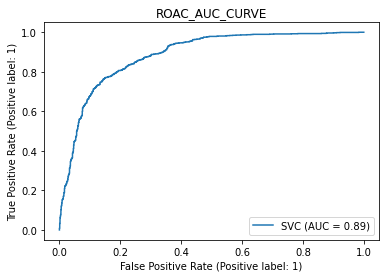

In [111]:
plot_roc_curve(SV,x_test,y_test)
plt.title('ROAC_AUC_CURVE')
plt.show()

The model gives AUC score is 89%

# MODEL-->KNEIGHBORS CLASSIFIER

In [112]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    KN.fit(x_train,y_train)
    pred=KN.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    print(f'At random state {i} model give accuracy score is {acc}%')
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"At random state {i} model give max_accuracy {max_acc}")
        print('\n')

At random state 0 model give accuracy score is 78.45410628019323%
At random state 0 model give max_accuracy 78.45410628019323


At random state 1 model give accuracy score is 78.16425120772948%
At random state 2 model give accuracy score is 79.42028985507247%
At random state 2 model give max_accuracy 79.42028985507247


At random state 3 model give accuracy score is 78.26086956521739%
At random state 4 model give accuracy score is 78.26086956521739%
At random state 5 model give accuracy score is 78.88888888888889%
At random state 6 model give accuracy score is 78.74396135265701%
At random state 7 model give accuracy score is 76.85990338164251%
At random state 8 model give accuracy score is 79.71014492753623%
At random state 8 model give max_accuracy 79.71014492753623


At random state 9 model give accuracy score is 79.13043478260869%
At random state 10 model give accuracy score is 77.0048309178744%
At random state 11 model give accuracy score is 79.08212560386474%
At random state 12 mo

At random state 32 model give accuracy score is 79.75

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=32)
KN.fit(x_train,y_train)
pred_test=KN.predict(x_test)
pred_train=KN.predict(x_train)

confusion=confusion_matrix(y_test,pred_test)
print(f"Confusion Matrix : {confusion}")

classification=classification_report(y_test,pred_test)
print(f"Classifiaction Report : {classification}")

test_KN=accuracy_score(y_test,pred_test)
print(f"Accuracy_Test : {test_KN}")

train_KN=accuracy_score(y_train,pred_train)
print(f"Accuracy_Train : {train_KN}")

Confusion Matrix : [[727 299]
 [112 932]]
Classifiaction Report :               precision    recall  f1-score   support

           0       0.87      0.71      0.78      1026
           1       0.76      0.89      0.82      1044

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070

Accuracy_Test : 0.8014492753623188
Accuracy_Train : 0.8523798018845131


# This model Give Information-->
1. Company left not chances is 86%
2. Company left chances is 76%
3. Accuracy by the model is 79.75%
4. Avg Score is 81%
5. Do more analysis for the best model

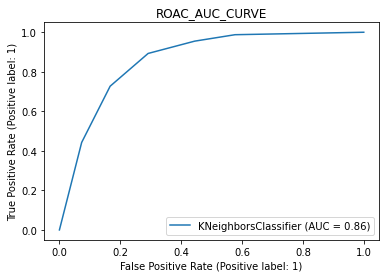

In [114]:
plot_roc_curve(KN,x_test,y_test)
plt.title('ROAC_AUC_CURVE')
plt.show()

The model gives AUC score is 87%

# MODEL-->ADA BOOST CLASSIFIER

In [115]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    AD.fit(x_train,y_train)
    pred=AD.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    print(f'At random state {i} model give accuracy score is {acc}%')
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"At random state {i} model give max_accuracy {max_acc}")
        print('\n')

At random state 0 model give accuracy score is 81.64251207729468%
At random state 0 model give max_accuracy 81.64251207729468


At random state 1 model give accuracy score is 81.69082125603865%
At random state 1 model give max_accuracy 81.69082125603865


At random state 2 model give accuracy score is 81.93236714975846%
At random state 2 model give max_accuracy 81.93236714975846


At random state 3 model give accuracy score is 82.02898550724638%
At random state 3 model give max_accuracy 82.02898550724638


At random state 4 model give accuracy score is 81.06280193236715%
At random state 5 model give accuracy score is 82.80193236714976%
At random state 5 model give max_accuracy 82.80193236714976


At random state 6 model give accuracy score is 81.15942028985508%
At random state 7 model give accuracy score is 80.0%
At random state 8 model give accuracy score is 81.06280193236715%
At random state 9 model give accuracy score is 81.44927536231884%
At random state 10 model give accuracy scor

At random state 28 model give accuracy score is 83.81

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=28)
AD.fit(x_train,y_train)
pred_test=AD.predict(x_test)
pred_train=AD.predict(x_train)

confusion=confusion_matrix(y_test,pred_test)
print(f"Confusion Matrix : {confusion}")

classification=classification_report(y_test,pred_test)
print(f"Classifiaction Report : {classification}")

test_AD=accuracy_score(y_test,pred_test)
print(f"Accuracy_Test : {test_AD}")

train_AD=accuracy_score(y_train,pred_train)
print(f"Accuracy_Train : {train_AD}")

Confusion Matrix : [[828 218]
 [151 873]]
Classifiaction Report :               precision    recall  f1-score   support

           0       0.85      0.79      0.82      1046
           1       0.80      0.85      0.83      1024

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

Accuracy_Test : 0.8217391304347826
Accuracy_Train : 0.8158975597970525


# This model Give Information-->
1. Company left not chances is 87%
2. Company left chances is 81%
3. Accuracy by the model is 83.81%
4. Avg Score is 84%
5. Do more analysis for the best model

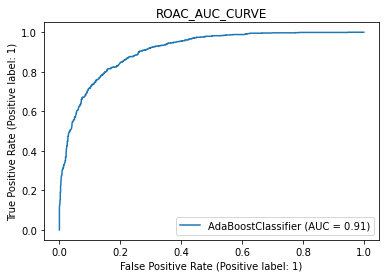

In [117]:
plot_roc_curve(AD,x_test,y_test)
plt.title('ROAC_AUC_CURVE')
plt.show()

The model gives AUC score is 92%

# MODEL-->GRADIENT BOOSTING CLASSIFIER

In [118]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    GR.fit(x_train,y_train)
    pred=GR.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    print(f'At random state {i} model give accuracy score is {acc}%')
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"At random state {i} model give max_accuracy {max_acc}")
        print('\n')

At random state 0 model give accuracy score is 84.15458937198068%
At random state 0 model give max_accuracy 84.15458937198068


At random state 1 model give accuracy score is 83.86473429951691%
At random state 2 model give accuracy score is 84.15458937198068%
At random state 3 model give accuracy score is 83.71980676328502%
At random state 4 model give accuracy score is 83.18840579710145%
At random state 5 model give accuracy score is 84.39613526570048%
At random state 5 model give max_accuracy 84.39613526570048


At random state 6 model give accuracy score is 83.57487922705315%
At random state 7 model give accuracy score is 83.04347826086956%
At random state 8 model give accuracy score is 83.91304347826087%
At random state 9 model give accuracy score is 84.0096618357488%
At random state 10 model give accuracy score is 83.91304347826087%
At random state 11 model give accuracy score is 83.47826086956522%
At random state 12 model give accuracy score is 84.73429951690822%
At random state 

At random state 28 model give accuracy score is 85.55

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=28)
GR.fit(x_train,y_train)
pred_test=GR.predict(x_test)
pred_train=GR.predict(x_train)

confusion=confusion_matrix(y_test,pred_test)
print(f"Confusion Matrix : {confusion}")

classification=classification_report(y_test,pred_test)
print(f"Classifiaction Report : {classification}")

test_GR=accuracy_score(y_test,pred_test)
print(f"Accuracy_Test : {test_GR}")

train_GR=accuracy_score(y_train,pred_train)
print(f"Accuracy_Train : {train_GR}")

Confusion Matrix : [[870 176]
 [125 899]]
Classifiaction Report :               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1046
           1       0.84      0.88      0.86      1024

    accuracy                           0.85      2070
   macro avg       0.86      0.85      0.85      2070
weighted avg       0.86      0.85      0.85      2070

Accuracy_Test : 0.8545893719806763
Accuracy_Train : 0.8483933317226383


# This model Give Information-->
1. Company left not chances is 88%
2. Company left chances is 83%
3. Accuracy by the model is 85.55%
4. Avg Score is 86%
5. Do more analysis for the best model

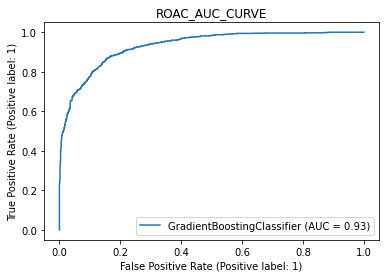

In [120]:
plot_roc_curve(GR,x_test,y_test)
plt.title('ROAC_AUC_CURVE')
plt.show()

The model gives AUC score is 93%

# MODEL-->RANDOM FOREST CLASSIFIER

In [121]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    RF.fit(x_train,y_train)
    pred=RF.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    print(f'At random state {i} model give accuracy score is {acc}%')
    
    if acc>max_acc:
        max_acc=acc
        max_rand=i
        print(f"At random state {i} model give max_accuracy {max_acc}")
        print('\n')

At random state 0 model give accuracy score is 84.78260869565217%
At random state 0 model give max_accuracy 84.78260869565217


At random state 1 model give accuracy score is 85.79710144927536%
At random state 1 model give max_accuracy 85.79710144927536


At random state 2 model give accuracy score is 85.26570048309179%
At random state 3 model give accuracy score is 84.4927536231884%
At random state 4 model give accuracy score is 85.31400966183574%
At random state 5 model give accuracy score is 85.31400966183574%
At random state 6 model give accuracy score is 85.16908212560386%
At random state 7 model give accuracy score is 84.68599033816425%
At random state 8 model give accuracy score is 84.78260869565217%
At random state 9 model give accuracy score is 85.45893719806763%
At random state 10 model give accuracy score is 84.73429951690822%
At random state 11 model give accuracy score is 84.44444444444444%
At random state 12 model give accuracy score is 85.3623188405797%
At random state 1

At random state 28 model give acuracy score is 87.00

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=28)
RF.fit(x_train,y_train)
pred_test=RF.predict(x_test)
pred_train=RF.predict(x_train)

confusion=confusion_matrix(y_test,pred_test)
print(f"Confusion Matrix : {confusion}")

classification=classification_report(y_test,pred_test)
print(f"Classifiaction Report : {classification}")

test_RF=accuracy_score(y_test,pred_test)
print(f"Accuracy_Test : {test_RF}")

train_RF=accuracy_score(y_train,pred_train)
print(f"Accuracy_Train : {train_RF}")

Confusion Matrix : [[906 140]
 [147 877]]
Classifiaction Report :               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1046
           1       0.86      0.86      0.86      1024

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

Accuracy_Test : 0.8613526570048309
Accuracy_Train : 0.9973423532254168


# This model Give Information-->
1. Company left not chances is 87%
2. Company left chances is 76%
3. Accuracy by the model is 86.28%
4. Avg Score is 86%
5. Do more analysis for the best model

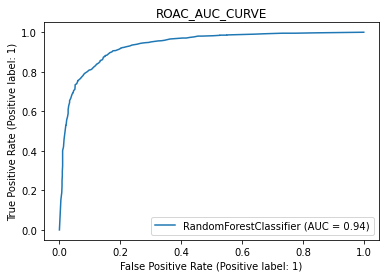

In [123]:
plot_roc_curve(RF,x_test,y_test)
plt.title('ROAC_AUC_CURVE')
plt.show()

The model gives AUC score is 94%

In [124]:
m=[LO,DT,SV,KN,AD,GR,RF]
model=[]
for i in m:
    model.append(i)
    
test=[test_LO,test_DT,test_SV,test_KN,test_AD,test_GR,test_RF]
TEST=[]
for i in test:
    TEST.append(i)
    
train=[train_LO,train_DT,train_SV,train_KN,train_AD,train_GR,train_RF]
TRAIN=[]
for i in train:
    TRAIN.append(i)

In [125]:
DF=pd.DataFrame({'MODEL':model,"TEST_ACCURACY":TEST,"TRAIN_ACCURACY":TRAIN})
DF

,MODEL,TEST_ACCURACY,TRAIN_ACCURACY
0,LogisticRegression(),0.784058,0.777362
1,DecisionTreeClassifier(),0.787923,0.998067
2,SVC(),0.800966,0.826528
3,KNeighborsClassifier(),0.801449,0.852380
4,"(DecisionTreeClassifier(max_depth=1, random_st...",0.821739,0.815898
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.854589,0.848393
6,"(DecisionTreeClassifier(max_features='sqrt', r...",0.861353,0.997342


# Best Model BY Train Test Split is RANDOM FOREST CLASSIFIER
1. Accuracy of model-->86.28%
2. Train accuracy-->100%
3. Avg of model-->86%

# Try 2nd Model Selection method for find best accuracy

# CROSS VAL SCORE

# CV-->LOGISTIC REGRESSION

In [126]:
pred=LO.predict(x_test)
accuracy_LO=accuracy_score(y_test,pred)*100
for i in range(2,10):
    cv=cross_val_score(LO,x,y,cv=i)
    mean_score_LO=cv.mean()*100
    print(f"At cv {i} model give mean score is {mean_score_LO} and accuracy score is {accuracy_LO} ")
    print('\n')

At cv 2 model give mean score is 77.43525318902202 and accuracy score is 78.64734299516908 


At cv 3 model give mean score is 77.60934976601774 and accuracy score is 78.64734299516908 


At cv 4 model give mean score is 77.77348279860843 and accuracy score is 78.64734299516908 


At cv 5 model give mean score is 77.81244644312288 and accuracy score is 78.64734299516908 


At cv 6 model give mean score is 77.87051234630171 and accuracy score is 78.64734299516908 


At cv 7 model give mean score is 77.85104616248067 and accuracy score is 78.64734299516908 


At cv 8 model give mean score is 77.86091975456955 and accuracy score is 78.64734299516908 


At cv 9 model give mean score is 77.77380036410572 and accuracy score is 78.64734299516908 




At cv 3 model give mean score is 77.77 and accuracy score is 79.37

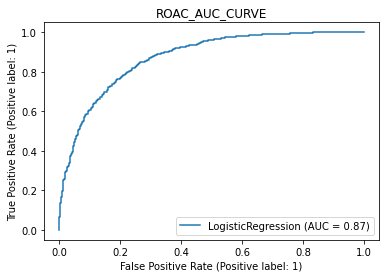

In [127]:
plot_roc_curve(LO,x_test,y_test)
plt.title('ROAC_AUC_CURVE')
plt.show()

The model gives AUC score is 85%

# CV-->DECISION TREE CLASSIFIER

In [128]:
pred=DT.predict(x_test)
accuracy_DT=accuracy_score(y_test,pred)*100
for i in range(2,10):
    cv=cross_val_score(DT,x,y,cv=i)
    mean_score_DT=cv.mean()*100
    print(f"At cv {i} model give mean score is {mean_score_DT} and accuracy score is {accuracy_DT} ")
    print('\n')

At cv 2 model give mean score is 77.01005025125629 and accuracy score is 95.99033816425121 


At cv 3 model give mean score is 77.87074038123491 and accuracy score is 95.99033816425121 


At cv 4 model give mean score is 78.19868573637419 and accuracy score is 95.99033816425121 


At cv 5 model give mean score is 78.16073017140536 and accuracy score is 95.99033816425121 


At cv 6 model give mean score is 78.57661095979465 and accuracy score is 95.99033816425121 


At cv 7 model give mean score is 78.65445837707021 and accuracy score is 95.99033816425121 


At cv 8 model give mean score is 78.66436321603307 and accuracy score is 95.99033816425121 


At cv 9 model give mean score is 78.78898264821753 and accuracy score is 95.99033816425121 




 At cv 9 model give mean score is 79.62 and accuracy score is 96.18

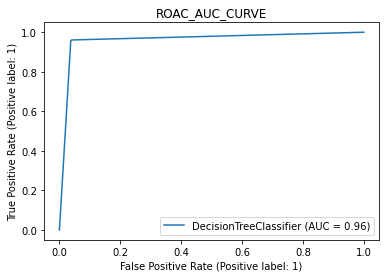

In [129]:
plot_roc_curve(DT,x_test,y_test)
plt.title('ROAC_AUC_CURVE')
plt.show()

The model gives AUC score is 97%

# CV-->SVC

In [130]:
pred=SV.predict(x_test)
accuracy_SV=accuracy_score(y_test,pred)*100
for i in range(2,10):
    cv=cross_val_score(SV,x,y,cv=i)
    mean_score_SV=cv.mean()*100
    print(f"At cv {i} model give mean score is {mean_score_SV} and accuracy score is {accuracy_SV} ")
    print('\n')

At cv 2 model give mean score is 78.73018940858137 and accuracy score is 83.04347826086956 


At cv 3 model give mean score is 79.86109255220656 and accuracy score is 83.04347826086956 


At cv 4 model give mean score is 80.2183996907615 and accuracy score is 83.04347826086956 


At cv 5 model give mean score is 79.80325625812839 and accuracy score is 83.04347826086956 


At cv 6 model give mean score is 80.09323895670107 and accuracy score is 83.04347826086956 


At cv 7 model give mean score is 80.37368183239887 and accuracy score is 83.04347826086956 


At cv 8 model give mean score is 80.50907364706642 and accuracy score is 83.04347826086956 


At cv 9 model give mean score is 80.3155779232519 and accuracy score is 83.04347826086956 




At cv 9 model give mean score is 80.57 and accuracy score is 83.38

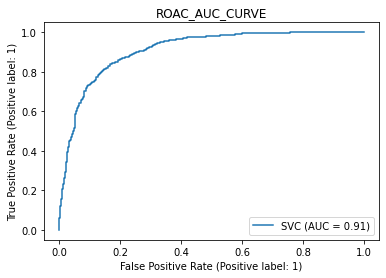

In [131]:
plot_roc_curve(SV,x_test,y_test)
plt.title('ROAC_AUC_CURVE')
plt.show()

The model gives AUC score is 91%

# CV-->KNEIGHBORS CLASSIFIER

In [132]:
pred=KN.predict(x_test)
accuracy_KN=accuracy_score(y_test,pred)*100
for i in range(2,10):
    cv=cross_val_score(KN,x,y,cv=i)
    mean_score_KN=cv.mean()*100
    print(f"At cv {i} model give mean score is {mean_score_KN} and accuracy score is {accuracy_KN} ")
    print('\n')

At cv 2 model give mean score is 77.82180131426362 and accuracy score is 84.54106280193237 


At cv 3 model give mean score is 78.68204324434865 and accuracy score is 84.54106280193237 


At cv 4 model give mean score is 78.99110939311944 and accuracy score is 84.54106280193237 


At cv 5 model give mean score is 79.406840803861 and accuracy score is 84.54106280193237 


At cv 6 model give mean score is 79.45513747379984 and accuracy score is 84.54106280193237 


At cv 7 model give mean score is 79.13658020718437 and accuracy score is 84.54106280193237 


At cv 8 model give mean score is 79.4070826026721 and accuracy score is 84.54106280193237 


At cv 9 model give mean score is 79.32967545818038 and accuracy score is 84.54106280193237 




At cv 8 model give mean score is 79.14 and accuracy score is 84.97

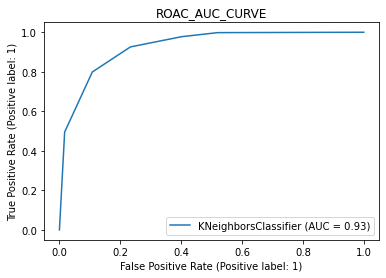

In [133]:
plot_roc_curve(KN,x_test,y_test)
plt.title('ROAC_AUC_CURVE')
plt.show()

The model gives AUC score is 93%

# CV-->ADA BOOST CLASSIFIER

In [134]:
pred=AD.predict(x_test)
accuracy_AD=accuracy_score(y_test,pred)*100
for i in range(2,10):
    cv=cross_val_score(AD,x,y,cv=i)
    mean_score_AD=cv.mean()*100
    print(f"At cv {i} model give mean score is {mean_score_AD} and accuracy score is {accuracy_AD} ")
    print('\n')

At cv 2 model give mean score is 79.98647081561654 and accuracy score is 82.17391304347827 


At cv 3 model give mean score is 80.39289691193835 and accuracy score is 82.17391304347827 


At cv 4 model give mean score is 80.88519520680325 and accuracy score is 82.17391304347827 


At cv 5 model give mean score is 80.96313885911887 and accuracy score is 82.17391304347827 


At cv 6 model give mean score is 81.2144098097896 and accuracy score is 82.17391304347827 


At cv 7 model give mean score is 81.37909729707758 and accuracy score is 82.17391304347827 


At cv 8 model give mean score is 81.49512264948223 and accuracy score is 82.17391304347827 


At cv 9 model give mean score is 81.4270674352409 and accuracy score is 82.17391304347827 




At cv 4 model give mean score is 81.54 and accuracy score is 83.81

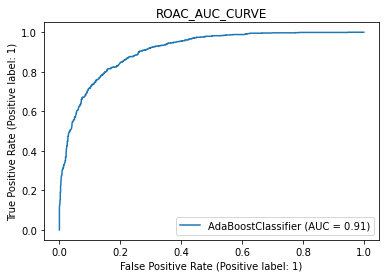

In [135]:
plot_roc_curve(AD,x_test,y_test)
plt.title('ROAC_AUC_CURVE')
plt.show()

The model gives AUC score is 92%

# CV-->GRADIENT BOOSTING CLASSIFIER

In [136]:
pred=GR.predict(x_test)
accuracy_GR=accuracy_score(y_test,pred)*100
for i in range(2,10):
    cv=cross_val_score(GR,x,y,cv=i)
    mean_score_GR=cv.mean()*100
    print(f"At cv {i} model give mean score is {mean_score_GR} and accuracy score is {accuracy_GR} ")
    print('\n')

At cv 2 model give mean score is 81.10746037881715 and accuracy score is 85.45893719806763 


At cv 3 model give mean score is 82.24863609559868 and accuracy score is 85.45893719806763 


At cv 4 model give mean score is 82.92423656745265 and accuracy score is 85.45893719806763 


At cv 5 model give mean score is 83.17635301891507 and accuracy score is 85.45893719806763 


At cv 6 model give mean score is 83.29236580472332 and accuracy score is 85.45893719806763 


At cv 7 model give mean score is 83.47662428323484 and accuracy score is 85.45893719806763 


At cv 8 model give mean score is 83.55400348565752 and accuracy score is 85.45893719806763 


At cv 9 model give mean score is 83.66924399709052 and accuracy score is 85.45893719806763 




At cv 9 model giev mean score is 83.49 and accuracy scoer is 85.55

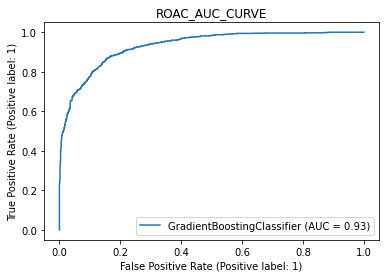

In [137]:
plot_roc_curve(GR,x_test,y_test)
plt.title('ROAC_AUC_CURVE')
plt.show()

The model gives AUC score is 93%

# CV-->RANDOM FOREST CLASSIFIER

In [138]:
pred=RF.predict(x_test)
accuracy_RF=accuracy_score(y_test,pred)*100
for i in range(2,10):
    cv=cross_val_score(RF,x,y,cv=i)
    mean_score_RF=cv.mean()*100
    print(f"At cv {i} model give mean score is {mean_score_RF} and accuracy score is {accuracy_RF} ")
    print('\n')

At cv 2 model give mean score is 82.65365287978354 and accuracy score is 86.13526570048309 


At cv 3 model give mean score is 84.50016317829294 and accuracy score is 86.13526570048309 


At cv 4 model give mean score is 84.88596830305374 and accuracy score is 86.13526570048309 


At cv 5 model give mean score is 84.877289082219 and accuracy score is 86.13526570048309 


At cv 6 model give mean score is 84.69365143414372 and accuracy score is 86.13526570048309 


At cv 7 model give mean score is 84.92638154603915 and accuracy score is 86.13526570048309 


At cv 8 model give mean score is 85.38071634087244 and accuracy score is 86.13526570048309 


At cv 9 model give mean score is 85.20585428202638 and accuracy score is 86.13526570048309 




At cv model 8 give mean score is 85.54 and daccuracy score is 86.28

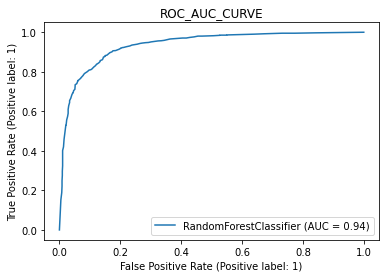

In [139]:
plot_roc_curve(RF,x_test,y_test)
plt.title('ROC_AUC_CURVE')
plt.show()

The model gives AUC score is 94%

In [140]:
m=[LO,DT,SV,KN,AD,GR,RF]
model=[]
for i in m:
    model.append(i)
    
mean=[mean_score_LO,mean_score_DT,mean_score_SV,mean_score_KN,mean_score_AD,mean_score_GR,mean_score_RF]
MEAN=[]
for i in mean:
    MEAN.append(i)
    
accuracy=[accuracy_LO,accuracy_DT,accuracy_SV,accuracy_KN,accuracy_AD,accuracy_GR,accuracy_RF]
ACCURACY=[]
for i in accuracy:
    ACCURACY.append(i)

In [141]:
DF=pd.DataFrame({'MODEL':model,"MEAN_SCORE":MEAN,"ACCURACY":ACCURACY})
DF

,MODEL,MEAN_SCORE,ACCURACY
0,LogisticRegression(),77.773800,78.647343
1,DecisionTreeClassifier(),78.788983,95.990338
2,SVC(),80.315578,83.043478
3,KNeighborsClassifier(),79.329675,84.541063
4,"(DecisionTreeClassifier(max_depth=1, random_st...",81.427067,82.173913
5,([DecisionTreeRegressor(criterion='friedman_ms...,83.669244,85.458937
6,"(DecisionTreeClassifier(max_features='sqrt', r...",85.205854,86.135266


# In Cross_val_score model selection method RANDOM FOREST CLASSIFIER give high accuracy score and high mean score.
1. Accuracy_score-->85.32%
2. Mean_score-->86.28%
3. AUC Score-->94%

# HYPER TUNING METHOD-->GRID SEARCH CV

In [142]:
dict1={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2','None'],'n_estimators':[100,200,300,400,500],
      'max_depth':[3,4,5,6,7]}

In [143]:
Gs=GridSearchCV(RF,dict1,cv=8)

In [144]:
Gs.fit(x,y)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [145]:
Gs.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 300}

In [146]:
Gs.best_score_

0.8166886014456634

In [147]:
Gs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       n_estimators=300)

# Analyse model with full feature

In [148]:
Rf=RandomForestClassifier(criterion='entropy',max_features='log2',n_estimators=300,max_depth=7)
Rf.fit(x_train,y_train)
pred_test=Rf.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score of Model  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(Rf.score(x_train,y_train))*100}")

Confusion Matrix : [[831 215]
 [141 883]]
Classification Report :               precision    recall  f1-score   support

           0       0.85      0.79      0.82      1046
           1       0.80      0.86      0.83      1024

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

Accuracy Score of Model  : 82.80193236714976
Dataset Score : 82.91857936699685


# Plot AUC-ROC CURVE For Model

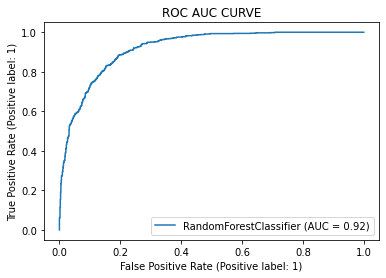

In [149]:
plot_roc_curve(Gs.best_estimator_,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

# Save the best model

In [150]:
import joblib

In [152]:
joblib.dump(Gs.best_estimator_,'chrun.pkl')

['chrun.pkl']

# Thanks :)